In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy import optimize
import traceback
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
from datetime import datetime
from enum import Enum
from itertools import combinations, product

In [3]:
FIGURE_SIZE = (15, 12)
SNS_FIGURE_SIZE = (20, 15)
RANDOM_STATE = 42
TEST_SIZE = 0.2

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv', parse_dates=['date'])

In [5]:
noUse_features = []
noUse_features.append('date')

In [6]:
def time_features_extractor (df, attr_list = ('year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek')):
    for attr in attr_list:
        df[attr] = df['date'].apply(lambda x: getattr(x, attr)).astype(float)
    return df

# EDA

In [7]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
df['date']= pd.to_datetime(df['date'])

In [9]:
datatypes = df.dtypes

In [10]:
datatypes
df['hour']=df.date.dt.hour

In [11]:
df.groupby(['hour']).mean()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
hour,,,,,,,,,,,,,,,,,,,,,
0,52.785888,3.187348,21.984336,39.948119,20.071736,41.147910,22.264619,39.485005,21.063244,39.240432,...,19.414779,41.716056,6.072972,755.755120,86.078366,3.577048,39.186436,3.798277,25.036051,25.036051
1,51.326034,1.301703,21.808582,39.960783,19.819235,41.360955,22.267202,39.543076,20.914659,39.179648,...,19.433406,42.324275,5.792174,755.720012,87.206407,3.499392,38.582725,3.722405,24.424345,24.424345
2,49.075426,0.425791,21.648167,39.940365,19.597539,41.536939,22.280853,39.598763,20.757661,39.130853,...,19.450984,42.822340,5.556792,755.638737,88.072993,3.554947,38.871046,3.632553,25.391812,25.391812
3,48.236010,0.304136,21.497259,39.924989,19.403972,41.710852,22.281183,39.664058,20.616136,39.095897,...,19.462287,43.220873,5.299311,755.528518,88.781630,3.505069,39.208637,3.501896,25.387615,25.387615
4,49.355231,0.206813,21.359599,39.926795,19.231141,41.865273,22.268101,39.711160,20.497575,39.088779,...,19.474698,43.499716,5.047476,755.412439,89.682178,3.424270,38.374696,3.411892,26.149424,26.149424
5,52.737226,0.644769,21.238172,40.023475,19.079161,42.119016,22.230471,39.670689,20.395547,39.086657,...,19.479062,43.716272,4.889751,755.355444,90.235706,3.442518,38.776156,3.353193,25.339575,25.339575
6,57.712895,1.082725,21.145559,40.149970,18.979968,42.376173,22.154772,39.567709,20.308784,39.144106,...,19.480995,43.776498,4.836766,755.357934,90.447341,3.432916,38.475061,3.333594,24.911502,24.911502
7,78.649635,3.467153,21.074625,40.380559,18.984885,42.500344,22.085462,39.464289,20.267484,39.271772,...,19.475854,43.518019,5.034693,755.454340,90.026373,3.486270,38.066606,3.449822,25.236404,25.236404
8,106.143552,4.294404,21.045174,40.621922,19.419363,41.959527,22.017272,39.152629,20.390519,39.332410,...,19.526685,42.707096,5.649926,755.603971,88.205770,3.671924,38.393248,3.736427,24.912508,24.912508


([<matplotlib.axis.XTick at 0x7fe1401427c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

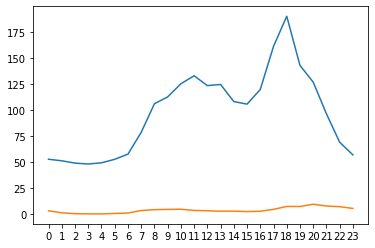

In [12]:
plt.plot(df.groupby(['hour']).mean().index.values,df.groupby(['hour']).mean().Appliances.values)
plt.plot(df.groupby(['hour']).mean().index.values,df.groupby(['hour']).mean().lights.values)
plt.xticks(np.arange(0, 24, step=1))

/Users/bharathpunati/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


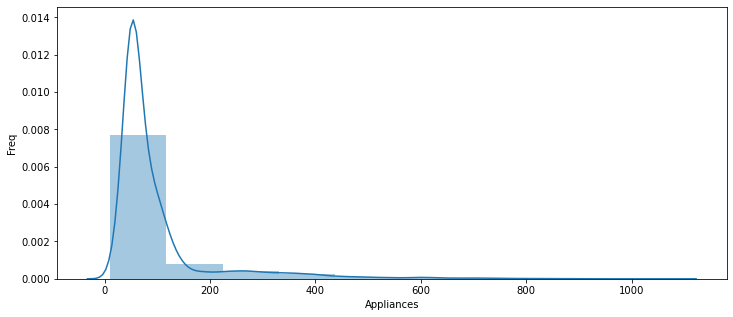

In [13]:
plot_col = df["Appliances"]
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliances')
plt.ylabel('Freq')
sns.distplot( plot_col, bins=10 ) ;

In [14]:
features_set = df.drop(['rv1', 'rv2','lights', 'Appliances'], axis = 1)
target_set = df['Appliances']

In [15]:
features_set = time_features_extractor(features_set, ('dayofweek', 'month', 'hour'))
features_set.sample(5)

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,hour,dayofweek,month
11932,2016-04-03 13:40:00,22.356667,42.933333,23.533333,38.400000,22.290000,40.700000,21.60,42.000000,19.500000,...,43.090000,18.666667,751.800000,54.333333,4.666667,40.000000,9.300000,13.0,6.0,4.0
16412,2016-05-04 16:20:00,23.700000,33.667500,23.790000,30.656667,23.200000,34.590000,23.50,34.156667,20.666667,...,37.334000,15.833333,765.466667,35.000000,4.000000,40.000000,0.400000,16.0,2.0,5.0
19192,2016-05-23 23:40:00,24.700000,44.790000,22.390000,46.260000,25.963333,42.833333,24.29,44.126667,23.600000,...,44.333333,11.100000,759.600000,84.666667,3.666667,40.000000,8.533333,23.0,0.0,5.0
9378,2016-03-16 20:00:00,22.600000,37.933333,20.100000,38.193333,23.926667,36.360000,21.70,33.463333,18.700000,...,36.656667,5.600000,765.100000,61.000000,6.000000,24.000000,-1.400000,20.0,2.0,3.0
18487,2016-05-19 02:10:00,23.230000,41.126667,20.790000,43.712857,24.600000,39.400000,23.10,40.090000,21.100000,...,43.200000,7.600000,749.116667,96.166667,2.000000,27.666667,7.016667,2.0,3.0,5.0


In [16]:
features_set['weekday'] = features_set['dayofweek'].apply(lambda x: x//5).astype(float)
noUse_features.append('dayofweek')

In [17]:
gb_month = features_set.groupby(['month'])
gb_hour = features_set.groupby(['hour'])

In [18]:
correlated_column_group_1 = ['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']
correlated_column_group_2 = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_7']
correlated_column_group_3 = ['T6', 'T_out']
correlated_column_group_4 = ['RH_8', 'RH_9']

<H2> Correlation of temperature per hour</h2>

Text(0, 0.5, 'Temprature in degree C')

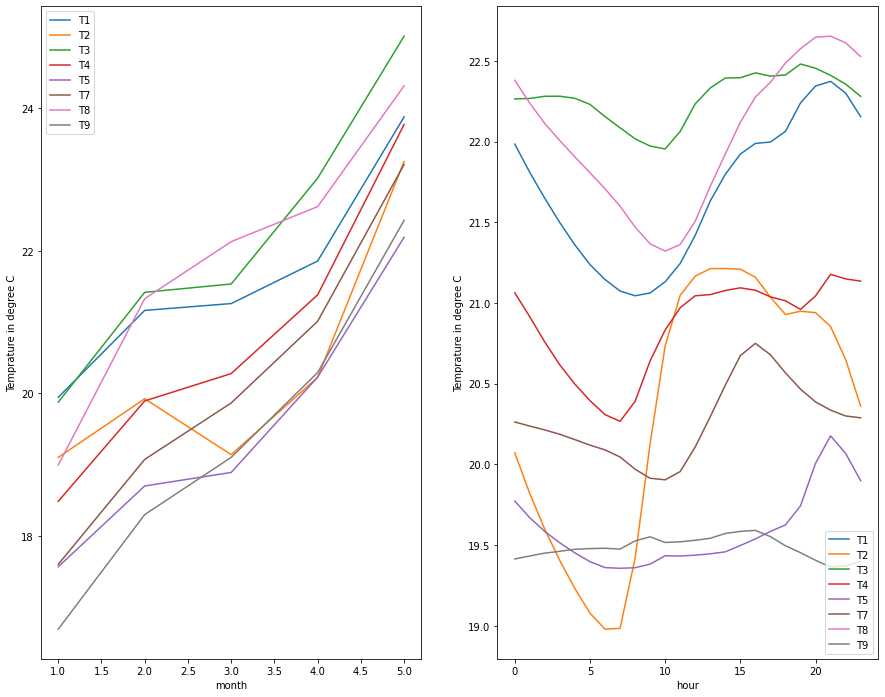

In [19]:
ccgroup1_gb_month = gb_month[correlated_column_group_1]
ccgroup1_gb_hour = gb_hour[correlated_column_group_1]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=FIGURE_SIZE)
ccgroup1_gb_month.mean().plot(ax=ax1)
ccgroup1_gb_hour.mean().plot(ax=ax2)

ax1.set_ylabel('Temprature in degree C')
ax2.set_ylabel('Temprature in degree C')

In [20]:
def features_average (df, features_to_average, new_feature_name):
    df[new_feature_name] = np.mean(df[features_to_average], axis=1)
    return df

In [21]:
correlated_column_group_1.remove('T2')
noUse_features = noUse_features + correlated_column_group_1
features_set = features_average(features_set,
                               features_to_average = correlated_column_group_1,
                               new_feature_name = 'T_avg_1_3_4_5_7_8_9')
features_set.sample(5)

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,hour,dayofweek,month,weekday,T_avg_1_3_4_5_7_8_9
19660,2016-05-27 05:40:00,23.89,45.060000,22.20,45.700000,26.700000,40.466667,24.356667,42.200000,22.390000,...,755.500000,89.333333,2.000000,45.666667,11.566667,5.0,4.0,5.0,0.0,24.070952
16390,2016-05-04 12:40:00,22.79,33.433333,25.10,27.530000,22.790000,33.030000,23.200000,32.790000,20.600000,...,766.633333,41.666667,2.333333,40.000000,1.533333,12.0,2.0,5.0,0.0,22.046735
6443,2016-02-25 10:50:00,20.20,40.433333,19.29,40.560000,20.500000,39.000000,21.823333,37.230000,17.890000,...,756.883333,77.500000,2.833333,28.166667,0.616667,10.0,3.0,2.0,0.0,19.696735
3981,2016-02-08 08:30:00,20.89,45.096667,20.10,43.700000,21.600000,44.090000,20.860000,43.863333,19.088889,...,738.700000,77.000000,10.000000,34.000000,4.800000,8.0,0.0,2.0,0.0,20.236032
14133,2016-04-18 20:30:00,21.89,37.966667,20.29,36.326667,22.426667,36.030000,22.600000,34.621429,20.760000,...,762.700000,59.500000,4.500000,40.000000,1.700000,20.0,0.0,4.0,0.0,21.595238


<H2> Correlation of Humidity per hour</H2>

Text(0, 0.5, 'Humidity in %')

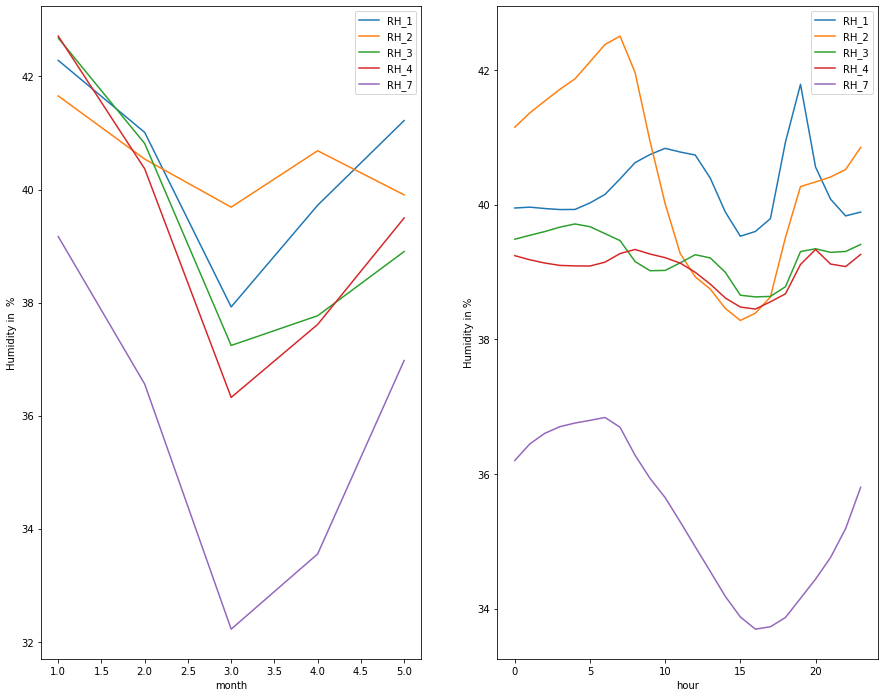

In [22]:
ccgroup2_gb_month = gb_month[correlated_column_group_2]
ccgroup2_gb_hour = gb_hour[correlated_column_group_2]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=FIGURE_SIZE)
ccgroup2_gb_month.mean().plot(ax=ax1)
ccgroup2_gb_hour.mean().plot(ax=ax2)

ax1.set_ylabel('Humidity in  %')
ax2.set_ylabel('Humidity in %')

Text(0, 0.5, 'Temprature in degree C')

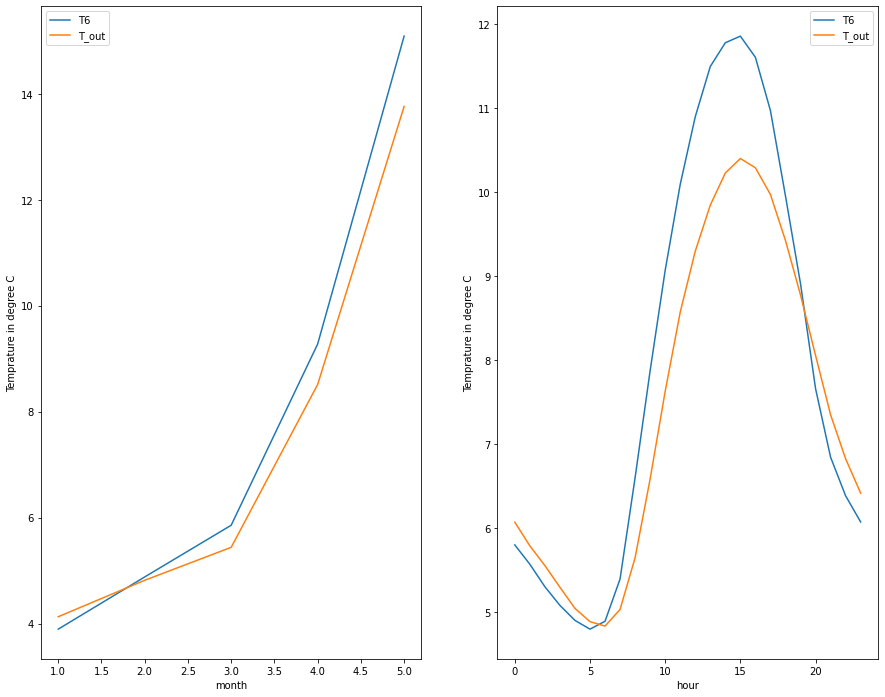

In [23]:
ccgroup3_gb_month = gb_month[correlated_column_group_3]
ccgroup3_gb_hour = gb_hour[correlated_column_group_3]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=FIGURE_SIZE)
ccgroup3_gb_month.mean().plot(ax=ax1)
ccgroup3_gb_hour.mean().plot(ax=ax2)

ax1.set_ylabel('Temprature in degree C')
ax2.set_ylabel('Temprature in degree C')

In [24]:
noUse_features = noUse_features + correlated_column_group_3
features_set = features_average(features_set,
                               features_to_average = correlated_column_group_3,
                               new_feature_name = 'T_avg_6_out')

Text(0, 0.5, 'Humidity in %')

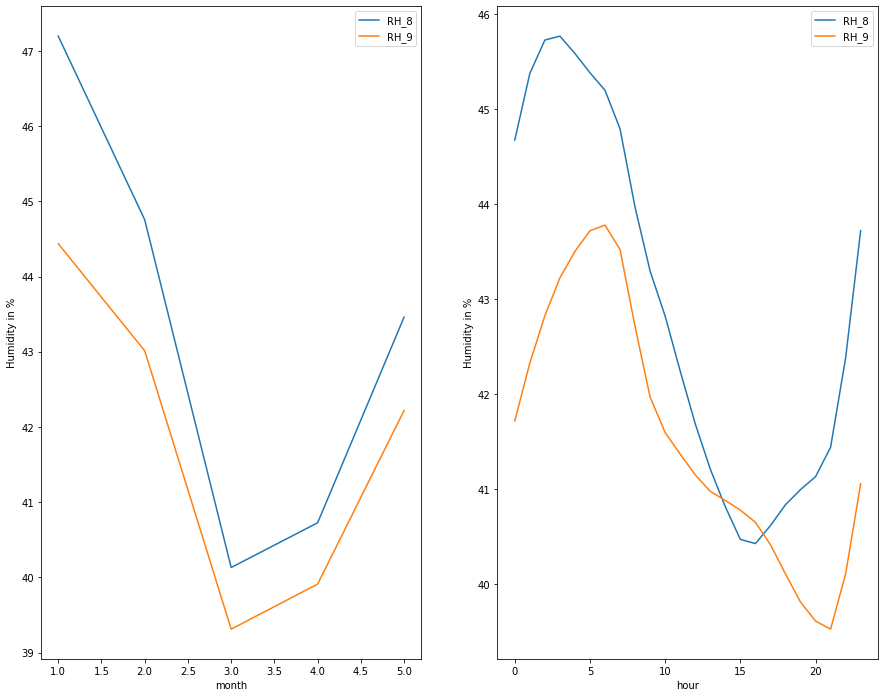

In [25]:
ccgroup4_gb_month = gb_month[correlated_column_group_4]
ccgroup4_gb_hour = gb_hour[correlated_column_group_4]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=FIGURE_SIZE)
ccgroup4_gb_month.mean().plot(ax=ax1)
ccgroup4_gb_hour.mean().plot(ax=ax2)

ax1.set_ylabel('Humidity in %')
ax2.set_ylabel('Humidity in %')

In [26]:
noUse_features = noUse_features + correlated_column_group_4
features_set = features_average(features_set,
                               features_to_average = correlated_column_group_4,
                               new_feature_name = 'RH_avg_8_9')

<AxesSubplot:>

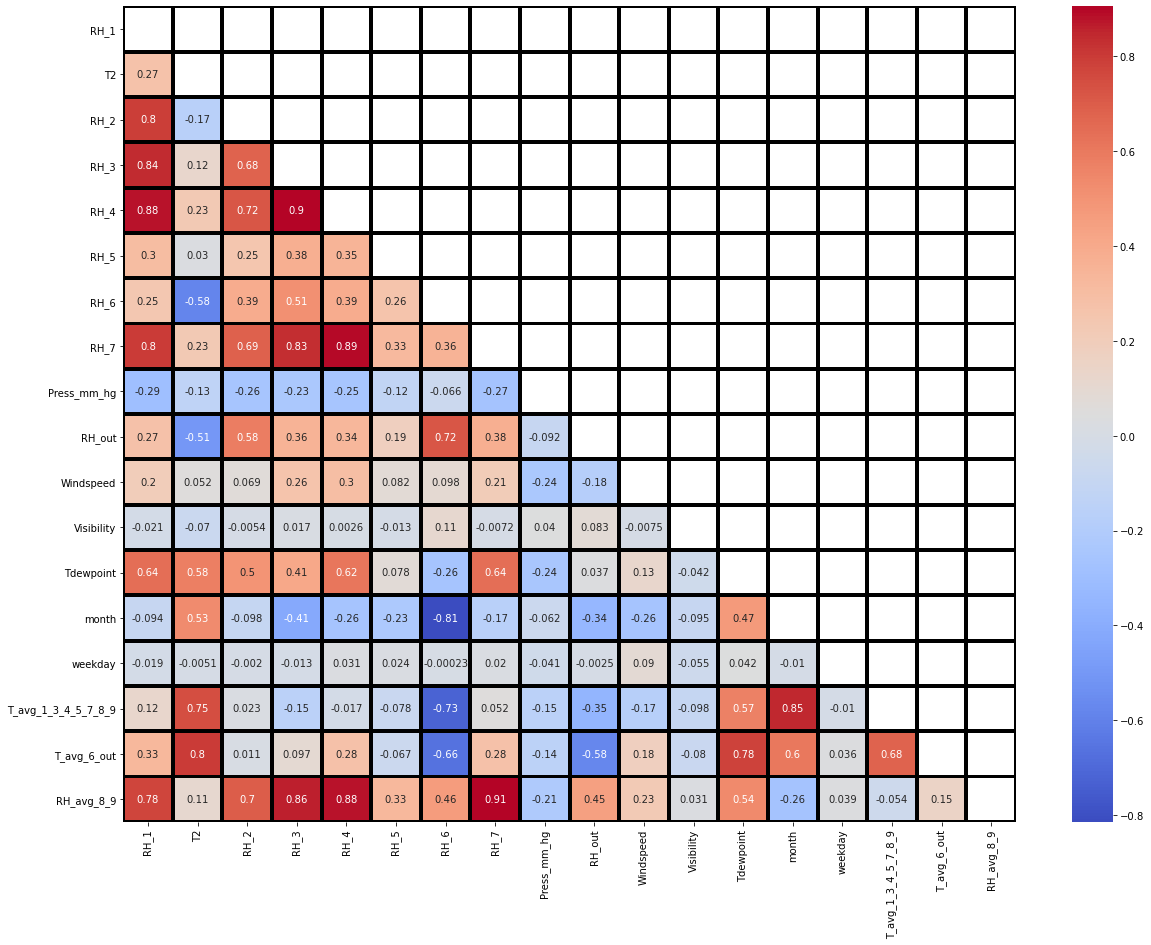

In [27]:
noUse_features.append('hour')

final_features_df = features_set.drop(noUse_features, axis=1)
final_features_df.shape

fig, ax = plt.subplots(figsize=SNS_FIGURE_SIZE)
mask_matrix = np.triu(final_features_df.corr())
sns.heatmap(final_features_df.corr(), annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', mask=mask_matrix)

In [28]:
final_features_df

,RH_1,T2,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,weekday,T_avg_1_3_4_5_7_8_9,T_avg_6_out,RH_avg_8_9
0,47.596667,19.200000,44.790000,44.730000,45.566667,55.200000,84.256667,41.626667,733.5,92.000000,7.000000,63.000000,5.300000,1.0,0.0,18.325714,6.813333,47.215000
1,46.693333,19.200000,44.722500,44.790000,45.992500,55.200000,84.063333,41.560000,733.6,92.000000,6.666667,59.166667,5.200000,1.0,0.0,18.330476,6.658333,47.211667
2,46.300000,19.200000,44.626667,44.933333,45.890000,55.090000,83.156667,41.433333,733.7,92.000000,6.333333,55.333333,5.100000,1.0,0.0,18.310476,6.463333,47.115000
3,46.066667,19.200000,44.590000,45.000000,45.723333,55.090000,83.423333,41.290000,733.8,92.000000,6.000000,51.500000,5.000000,1.0,0.0,18.281429,6.341667,46.995000
4,46.333333,19.200000,44.530000,45.000000,45.530000,55.090000,84.893333,41.230000,733.9,92.000000,5.666667,47.666667,4.900000,1.0,0.0,18.295714,6.250000,46.995000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,46.560000,25.890000,42.025714,41.163333,45.590000,52.400000,1.000000,44.500000,755.2,55.666667,3.333333,23.666667,13.333333,5.0,0.0,24.723810,23.765000,48.432000
19731,46.500000,25.754000,42.080000,41.223333,45.590000,52.326667,1.000000,44.414286,755.2,56.000000,3.500000,24.500000,13.300000,5.0,0.0,24.717211,23.398333,48.290000
19732,46.596667,25.628571,42.768571,41.690000,45.730000,52.266667,1.000000,44.400000,755.2,56.333333,3.666667,25.333333,13.266667,5.0,0.0,24.702857,23.046667,48.225000
19733,46.990000,25.414000,43.036000,41.290000,45.790000,52.200000,1.000000,44.295714,755.2,56.666667,3.833333,26.166667,13.233333,5.0,0.0,24.664643,22.383333,48.168125


In [29]:
scale = MinMaxScaler()

In [30]:
scaled = scale.fit_transform(final_features_df)

In [31]:
class LinearRegression:
  def __init__(self, X, y, learningRate, tolerance = 0.01, ld = 0, maxIteration = 1000, error = 'rmse', epochs = 50, gd = False, sgd = False):
     self.X=X
     self.y=y
     self.learningRate=learningRate
     self.tolerance=tolerance
     self.ld=ld
     self.maxIteration=maxIteration
     self.error=error
     self.epochs=epochs
     self.gd=gd
     self.sgd=sgd

  def splitTraintest(self):
        
      X_train,X_test,y_train,y_test= train_test_split(self.X,self.y,test_size=0.3,random_state=0)
        
      return X_train,X_test,y_train,y_test
    
  def add_x0(self,X):
      return np.column_stack([np.ones([X.shape[0],1]), X])
    
  def normalize(self,X):
        
      mean=np.mean(X)
      std=np.std(X)
      X_norm=(X-mean)/std
      X_norm=self.add_x0(X_norm)
        
      return X_norm, mean, std
    
  def normalizeTestData(self,X_test,train_mean,train_std):
        
      X_norm=(X_test-train_mean)/train_std
      X_norm=self.add_x0(X_norm)
        
      return X_norm
    
  def rank(self,X,eps=1e-12):
        
      u,s,vh=np.linalg.rank(X)
        
      return len([x for x in vh if abs(x)>eps])
    
  def checkMatrix(self, X):
        
      X_rank=np.linalg.matrix_rank(X)
        
      if X_rank==min(X.shape[0],X.shape[1]):
          self.full_rank=True
          print("Data is full rank")
            
      else:
          self.full_rank=False
          print("Data is not full rank")
            
  def checkInvertibility(self,X):
        
      if X.shape[0]<X.shape[1]:
          self.lowRank=True
          print("Matrix is low rank")
            
      else:
          self.lowRank=False
          print("Matrix is not Low Rank")
            
  def closedFormSolution(self,X,y):
       
      A=X.T.dot(X)
      I=np.eye(A.shape[0])
      theta=np.linalg.inv(X.T.dot(X)+self.ld*I).dot(X.T).dot(y)
      return theta
    
  def gradientDescent(self,X,y):
        
      errors=[]
      thetas=[]
        
      last_error=float('inf')
      for t in tqdm(range(self.maxIteration)):
        
          self.theta=self.theta-self.learningRate*(self.cost_derivative(X,y))
          thetas.append(self.theta)
            
          if self.error=='rmse':
              cur_error=self.rmse(X,y)
                
          else:
              cur_error=self.sse(X,y)
                
          error_diff=last_error-cur_error
          last_error=cur_error
            
          errors.append(cur_error)
            
          if error_diff<self.tolerance:
              print("The model stopped learning and converged at iteration {}".format(t))
              break
        
      axis=list(range(0,len(errors),1))
      xlabel='iterations'
      ylabel='RMSE'
      self.plot_errors(errors,axis,xlabel,ylabel)
      return
    
  def plot_errors(self,errors,axis,xlabel,ylabel):

      ax=sns.lineplot(x=axis,y=errors)
      ax.set(xlabel=xlabel,ylabel=ylabel)
    
        
            
  def stochasticgradientDescent(self,X,y):
       
      errors=[]
        
      for epoch in range(self.epochs):
          cur_error=0
          last_error=float('inf')
          for i in range(100):
              index=np.random.randint(X.shape[0])
              Xi=X[index:index+1]
              yi=y[index:index+1]
              l=epoch*100+i
              self.learningRate=self.learning_schedule(l)
              y_hat=Xi.dot(self.theta.T)
              error=y_hat-yi
              cost_derivative=(((y_hat-yi)*Xi+self.ld*self.theta))              
              self.theta=self.theta-self.learningRate*cost_derivative
                
              cur_error=cur_error+(error**2)
                
          rmse=float(np.sqrt(cur_error/100))
          error_diff=last_error-rmse
          last_error=rmse
          errors.append(rmse)
          print(' Epoch {},\n  Learning Rate={}, \n RMSE={}'.format(epoch,self.learningRate,rmse))
            
      axis=list(range(0,len(errors),1))
      xlabel='epochs'
      ylabel='RMSE'
      self.plot_errors(errors,axis,xlabel,ylabel)
      return
                
  def learning_schedule(self,t):
      t0,t1=5,50
      return t0/(t+t1)
        
            
  def predict(self, X):
        
      return X.dot(self.theta.T)
    
  def sse(self,X,y):
        
      y_hat=self.predict(X)
      return ((y_hat-y)**2).sum()
    
  def rmse(self,X,y):

      return np.sqrt(self.sse(X,y)/X.shape[0])
   
  def cost_derivative(self,X,y):
        
      y_hat=self.predict(X)
      grad=(((y_hat-y).dot(X)+self.ld*self.theta))/X.shape[0]
      return grad
    
  def run_model(self):
        
        
      self.X_train,self.X_test,self.y_train,self.y_test= self.splitTraintest()
            
      self.X_train,self.mean,self.std= self.normalize(self.X_train)
      self.X_test=self.normalizeTestData(self.X_test,self.mean,self.std)
    
      self.checkMatrix(self.X_train)
      self.checkInvertibility(self.X_train)
        
      if self.gd:
          self.theta=np.ones(self.X_train.shape[1],dtype=np.float64)*0
          self.gradientDescent(self.X_train,self.y_train)
        
      elif self.sgd:
          self.theta=np.ones(self.X_train.shape[1],dtype=np.float64)*0
          self.stochasticgradientDescent(self.X_train,self.y_train)
            
      elif self.full_rank and not self.lowRank and self.X_train.shape[0]<=10000:
           self.theta=self.closedFormSolution(self.X_train,self.y_train)
            
     # print(self.theta)
        
      sse_train=self.sse(self.X_train,self.y_train)
      rmse_train=self.rmse(self.X_train,self.y_train)
      print('\n The SSE on training data is {} and RMSE is {}'.format(sse_train,rmse_train))
        
      sse=self.sse(self.X_test,self.y_test)
      rmse=self.rmse(self.X_test,self.y_test)
        
      print('\n The SSE on test data is {} and RMSE is {}'.format(sse,rmse))


In [32]:
regression_withReg=LinearRegression(np.nan_to_num(final_features_df), target_set, learningRate=0.0025,epochs=35,tolerance=0.001,ld=1,gd=True)

  4%|▍         | 43/1000 [00:00<00:02, 425.56it/s]

Data is full rank
Matrix is not Low Rank


  9%|▉         | 88/1000 [00:00<00:01, 513.46it/s]


The model stopped learning and converged at iteration 88

 The SSE on training data is 141141432.46765864 and RMSE is 101.08053562759186

 The SSE on test data is 66516911.35739113 and RMSE is 105.99088220146491


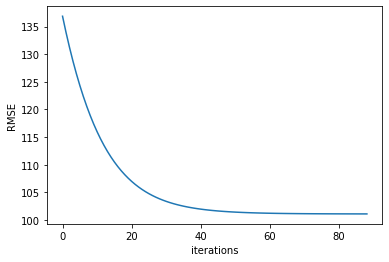

In [33]:
try:
 regression_withReg.run_model()
except:
 traceback.print_exc()


<H1>Tried doing KNN but the execution time was very high. So was not able to compute the accuracy.</H1> 

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(final_features_df, target_set, test_size = 0.3, random_state= 23)

In [35]:

class KNN:
  
    def __init__(self, k):
        self.k = k


    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        
        m = self.X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []
        
         
        for i in range(n):  
            distance = [] 
            for j in range(m):  
                #print(i,j,n,m)
                
                    d = round((np.sqrt(np.sum(np.square(X_test.iloc[i,:].values - self.X_train.iloc[j,:].values)))), 2) 
                
                
                    distance.extend((d, y_train.iloc[j]))   
                #print(d, j) 
            distance = sorted(distance) 
            print(distance)
            
            neighbors = []
            for item in range(self.k):
                
                print(range(self.k))
                print(item)
                #print(distance)
                neighbors.append(distance[item])
                print(neighbors)      
                y_pred.append(np.mean(neighbors))  
        return y_pred

In [36]:
knn = KNN(k=14)
# model fitting
knn.fit(X_train, y_train)
# predicting


In [37]:
try:
  _y_pred = knn.predict(X_test)
except:
  traceback.print_exc()

[1.33, 1.95, 2.55, 2.98, 3.11, 3.24, 3.26, 3.83, 4.05, 4.64, 4.75, 4.8, 5.05, 5.37, 5.59, 6.45, 6.48, 6.67, 7.07, 7.17, 7.2, 7.31, 7.34, 7.57, 7.64, 7.68, 7.7, 8.1, 8.11, 8.22, 8.33, 8.44, 8.46, 8.52, 8.52, 8.54, 8.58, 8.66, 8.73, 8.74, 8.75, 8.79, 8.83, 8.89, 8.91, 8.94, 9.2, 9.22, 9.22, 9.26, 9.42, 9.44, 9.48, 9.5, 9.62, 9.62, 9.62, 9.67, 9.7, 9.75, 9.76, 9.81, 9.83, 9.85, 9.87, 9.9, 9.92, 9.96, 10, 10, 10, 10, 10.02, 10.06, 10.06, 10.06, 10.09, 10.1, 10.11, 10.13, 10.14, 10.15, 10.16, 10.16, 10.17, 10.28, 10.28, 10.33, 10.33, 10.33, 10.36, 10.36, 10.39, 10.42, 10.45, 10.45, 10.47, 10.5, 10.5, 10.55, 10.55, 10.55, 10.56, 10.56, 10.59, 10.6, 10.64, 10.65, 10.73, 10.73, 10.74, 10.76, 10.79, 10.79, 10.79, 10.8, 10.8, 10.83, 10.83, 10.87, 10.91, 10.92, 10.95, 10.97, 10.97, 11.01, 11.02, 11.03, 11.06, 11.06, 11.07, 11.09, 11.11, 11.12, 11.13, 11.15, 11.17, 11.18, 11.18, 11.2, 11.22, 11.26, 11.27, 11.27, 11.3, 11.3, 11.34, 11.35, 11.35, 11.37, 11.38, 11.41, 11.46, 11.47, 11.48, 11.49, 11.5

Traceback (most recent call last):
  File "<ipython-input-37-8d10b7e090d9>", line 2, in <module>
    _y_pred = knn.predict(X_test)
  File "<ipython-input-35-fc0e51a28553>", line 23, in predict
    d = round((np.sqrt(np.sum(np.square(X_test.iloc[i,:].values - self.X_train.iloc[j,:].values)))), 2)
  File "<__array_function__ internals>", line 5, in sum
  File "/Users/bharathpunati/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 2241, in sum
    return _wrapreduction(a, np.add, 'sum', axis, dtype, out, keepdims=keepdims,
  File "/Users/bharathpunati/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 87, in _wrapreduction
    return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
KeyboardInterrupt


In [38]:
print("Accuracy =", np.round(accuracy_score(y_test, b_y_pred),5))

NameError: name 'b_y_pred' is not defined

In [39]:
y_test

13098    80
2688     50
8420     40
4071     60
1561     50
         ..
2951     40
3788     40
3436     70
99       30
6219     80
Name: Appliances, Length: 5921, dtype: int64

# SVM

In [52]:
class SoftMarginSVM:
    
    """Class that performs Soft margin SVM:
    ---------------
    Parameters:
    X-features
    y-target variable
    alpha-lagrangian multiplier
    w-weights(parameters which are learnt)
    C-regularization term
    
    """
    
    def __init__(self,X,y,C):
        self.alpha = None
        self.w = None
        self.supportVectors = None
        self.X=X
        self.y=y
        self.C = C
        
    def normalize(self,X):
        
        '''function to scale the train data'''
        
        mean=np.mean(X)
        std=np.std(X)
        X_norm=(X-mean)/std
        X_norm=self.addX0(X_norm)
        
        return X_norm,mean,std
    
    def normalizeTestData(self,X_test,train_mean,train_std):
        
        '''function to scale the test data'''
        
        X_norm=(X_test-train_mean)/train_std
        X_norm=self.addX0(X_norm)
        
        return X_norm
        
    
    def addX0(self,X):
        
        ''' function to add bias to the dataset'''
        
        return np.column_stack([np.ones([X.shape[0],1]),X])
                

                

    def fit(self, X, y):
        
        '''function for fitting the model'''

        N = len(y)

        # Gram matrix of (X,y)
        Xy = X*y[:,np.newaxis] 

        GramXy = np.matmul(Xy,Xy.T) 
    
        def Ld0(G, alpha): 
            
            '''function to calculate the dual form of SVM'''
            obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))

            return obj_fn
        

            # Derivative of Lagrangian Function
        def partialDerivationLd0(G, alpha):
            
            '''function to calculate derivative of lagrangian function'''
            
            par_der = np.ones_like(alpha) - alpha.dot(G)
            return par_der

        alpha = np.ones(N)

        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))

        constraints = ({'type': 'eq', 'fun':lambda a: np.dot(a,y), 'jac': lambda a: y },
                    {'type': 'ineq', 'fun':lambda a: b - np.dot(A, a), 'jac': lambda a: -A}) 

        optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                x0 = alpha,
                                method = 'SLSQP',
                                jac = lambda a: - partialDerivationLd0(GramXy, a),
                                constraints = constraints)
        
        self.alpha = optRes.x


        self.w =  np.sum(( self.alpha[:, np.newaxis] * Xy), axis = 0)

        epsilon = 1e-4
        self.supportVectors = X[ self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]


        self.b1 = self.supportLabels[0] - np.matmul(self.supportVectors[0].T, self.w)
        
        b = []
        for i in tqdm(range(len(self.supportLabels))):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append( b_i )
        
        self.b2 = sum(b)/len(b)
        
        self.intercept = self.b2
        
    def predict(self, X):
        
        '''function to return the predicted classes'''
    
        return 2*(np.matmul(X, self.w) + self.intercept > 0) - 1
    
    
        
        return accuracy,precision,recall,f1score
    
    def runModel(self):
        
        '''function to run the model'''        
        
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.2,random_state=0)
        
        #normalizing the data
        self.X_train,self.mean,self.std=self.normalize(self.X_train)
        self.X_test=self.normalizeTestData(self.X_test,self.mean,self.std)
        
        self.fit(self.X_train,self.y_train)
        
        y_hat_train = self.predict(self.X_train)
        
        print('Evaluation results for Training Date:\n')
        print('MAE: ', mean_absolute_error(y_hat_train, self.y_train))
        print('MSE: ', mean_squared_error(y_hat_train, self.y_train))
        print('R2 Score: ', r2_score(y_hat_train, self.y_train))
        print('\n\n')
        
        y_hat_test = self.predict(self.X_test)
        
        print('Evaluation results for Testing Dat:\n')
        print('MAE: ', mean_absolute_error(y_hat_test, self.y_test))
        print('MSE: ', mean_squared_error(y_hat_test, self.y_test))
        print('R2 Score: ', r2_score(y_hat_test, self.y_test))

In [53]:
model = SoftMarginSVM(X_train.values[:1000,:], y_train.values[:1000], C=1.5)
model.runModel()

100%|██████████| 439/439 [00:00<00:00, 246922.28it/s]

Evaluation results for Training Date:

MAE:  99.1375
MSE:  20360.65
R2 Score:  -23957.109946681376



Evaluation results for Testing Dat:

MAE:  90.38
MSE:  15931.0
R2 Score:  -20446.952766012066


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

p={'max_features': ['auto', 'sqrt', 'log2']}

des=RandomForestRegressor()

x=GridSearchCV(des, p, cv=5, scoring='neg_median_absolute_error')

x.fit(X_train, y_train)

results = pd.DataFrame(x.cv_results_)

results[results['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,2.652664,0.03963,0.051737,0.001724,sqrt,{'max_features': 'sqrt'},-13.3,-12.3,-12.3,-13.3,-12.75,-12.79,0.447661,1


In [47]:
des=RandomForestRegressor(max_features='log2')

des.fit(X_train, y_train)

y_pred=des.predict(X_test)

y_pred

array([100.6,  49.2,  42.9, ..., 105.5,  74.9, 104.9])

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE: ', mean_absolute_error(y_pred, y_test))
print('RMSE: ', mean_squared_error(y_pred, y_test))
print('R2 Score: ', r2_score(y_pred, y_test))

MAE:  32.94970444181726
RMSE:  5085.803246073298
R2 Score:  -0.18714268340660878


# Decision Trees

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV


p = {'max_depth':np.arange(1,31), 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter': ['best', 'random']}


des=DecisionTreeRegressor()

x=GridSearchCV(des, p, cv=5, scoring='neg_median_absolute_error')

x.fit(X_train, y_train)

results = pd.DataFrame(x.cv_results_)

results[results['rank_test_score']==1]

/Users/bharathpunati/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bharathpunati/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bharathpunati/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/Users/bharathpunati/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/bharathpunati/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimat

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
97,0.025587,0.000433,0.001221,0.000034,friedman_mse,19,random,"{'criterion': 'friedman_mse', 'max_depth': 19,...",-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0.0,1
99,0.027797,0.000217,0.001391,0.000087,friedman_mse,20,random,"{'criterion': 'friedman_mse', 'max_depth': 20,...",-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0.0,1
101,0.029808,0.000249,0.001572,0.000029,friedman_mse,21,random,"{'criterion': 'friedman_mse', 'max_depth': 21,...",-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0.0,1
102,0.168972,0.004565,0.001561,0.000062,friedman_mse,22,best,"{'criterion': 'friedman_mse', 'max_depth': 22,...",-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0.0,1
103,0.029274,0.000482,0.001440,0.000093,friedman_mse,22,random,"{'criterion': 'friedman_mse', 'max_depth': 22,...",-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0.0,1
104,0.170358,0.005271,0.001563,0.000174,friedman_mse,23,best,"{'criterion': 'friedman_mse', 'max_depth': 23,...",-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0.0,1
105,0.029075,0.000137,0.001214,0.000013,friedman_mse,23,random,"{'criterion': 'friedman_mse', 'max_depth': 23,...",-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0.0,1
106,0.173227,0.004409,0.001392,0.000132,friedman_mse,24,best,"{'criterion': 'friedman_mse', 'max_depth': 24,...",-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0.0,1
107,0.030095,0.000396,0.001240,0.000008,friedman_mse,24,random,"{'criterion': 'friedman_mse', 'max_depth': 24,...",-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0.0,1
108,0.175270,0.006130,0.001497,0.000169,friedman_mse,25,best,"{'criterion': 'friedman_mse', 'max_depth': 25,...",-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,0.0,1


In [50]:
des=DecisionTreeRegressor(splitter='random', max_depth=25, criterion='friedman_mse')

des.fit(X_train, y_train)

y_pred=des.predict(X_test)

y_pred

array([ 90.,  40.,  40., ..., 170.,  40.,  90.])

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE: ', mean_absolute_error(y_pred, y_test))
print('MSE: ', mean_squared_error(y_pred, y_test))
print('R2 Score: ', r2_score(y_pred, y_test))

MAE:  39.89955439592822
MSE:  9022.749306215806
R2 Score:  0.09787871168606344
